# Kerberoasting

#### Author: Rifqi Ardia Ramadhan

"Kerberoasting is one of the most common attacks against domain controllers. It is used to crack a Kerberos (encrypted password) hash using brute force techniques. If successful, it can crack NTLM hashes in a few hours and provide the adversary with a clear-text password which can then be used to progress further with attacks like Silver Tickets, etc." - Sujit Ghosal via AwakeSecurity.

Kerberoasting at high level attacks usually happened in several steps:

- *Enumerating Service Principal Names* (SPNs) of AD service accounts e.g. MSSQL, IIS web services, etc.
- *Requesting Ticket-Granting Service (TGS)* Tickets for the extracted service account Service Principal Names (SPNs). Usually this ticket is requesting for weak RC4 encryption to initiate TGS-REQ requests. 
- As a result of the above Kerberos TGS request, the AD domain controller is *responding back with a ticket for the service account with the requested services.* 
- The adversary then can extract these hashes from memory cache using tools such as Mimikatz, then decrypt the hash easily.

## Use Case
### Objective
Identify if there is any AD that responded with RC4 encryption on Kerberos. That way we can look for malicious TGS request. This use case specifically try to detect from network traffic perspective.

### Log Requirements
Kerberos Traffic

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | TGS-REP sent with etype 23| | etype 23 means that it's using ARCFOUR-HMAC-MD5|
|2   | In general, there is abnormal amount of TGS-REQ/TGS-REP traffic|||

### References
https://attack.mitre.org/techniques/T1558/003/

https://awakesecurity.com/blog/kerberoasting-threat-hunting-for-active-directory-attacks/

### Sample
Dataset acquired from [PCAP-ATTACK](https://github.com/sbousseaden/PCAP-ATTACK)

The Wireshark filter to see the interesting traffic:

```
(kerberos.msg_type == 13) && (kerberos.etype == 23)
```

`msg_type 13` means that it's a Kerberos Ticket Granting Service Response. `etype 23` means that the encryption type is ARCFOUR. 

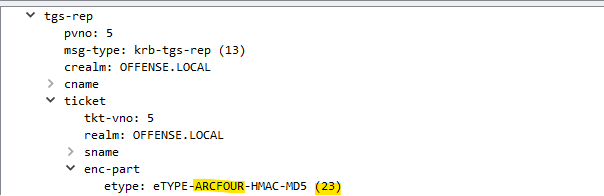